# **PART - A**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

sentiment = pd.read_csv('/content/drive/MyDrive/TRADE_ANLAYSIS/fear_greed_index (1).csv')
trades = pd.read_csv('/content/drive/MyDrive/TRADE_ANLAYSIS/historical_data.csv')


In [3]:
print("Sentiment shape:", sentiment.shape)
print("Trades shape:", trades.shape)

Sentiment shape: (2644, 4)
Trades shape: (211224, 16)


In [4]:
print("Missing values in Sentiment dataset:\n")
print(sentiment.isnull().sum())

print("\nMissing values in Trades dataset:\n")
print(trades.isnull().sum())


Missing values in Sentiment dataset:

timestamp         0
value             0
classification    0
date              0
dtype: int64

Missing values in Trades dataset:

Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64


In [5]:
print("Duplicate rows in Sentiment:", sentiment.duplicated().sum())
print("Duplicate rows in Trades:", trades.duplicated().sum())

Duplicate rows in Sentiment: 0
Duplicate rows in Trades: 0


In [8]:
# Convert sentiment date
sentiment['date'] = pd.to_datetime(
    sentiment['date'],
    errors='coerce'
)

In [9]:
# Convert trade timestamp (day-first format)
trades['Timestamp IST'] = pd.to_datetime(
    trades['Timestamp IST'],
    dayfirst=True,
    errors='coerce'
)

In [10]:
# Extract only date (remove time component)
sentiment['date'] = sentiment['date'].dt.date
trades['date'] = trades['Timestamp IST'].dt.date

In [11]:
merged_data = trades.merge(
    sentiment[['date', 'classification', 'value']],
    on='date',
    how='left'
)

In [12]:
print("Rows before merge:", trades.shape[0])
print("Rows after merge:", merged_data.shape[0])

Rows before merge: 211224
Rows after merge: 211224


In [13]:
merged_data.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,classification,value
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,Extreme Greed,80.0
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,Extreme Greed,80.0
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,Extreme Greed,80.0
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,Extreme Greed,80.0
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,Extreme Greed,80.0


## **KEY METRICS FOR ANALYSIS**

In [14]:
daily_pnl = (
    merged_data
    .groupby(['Account', 'date'])['Closed PnL']
    .sum()
    .reset_index()
)

daily_pnl.head()


,Account,date,Closed PnL
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,0.0
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-17,0.0
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-18,0.0
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-22,-21227.0
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-26,1603.1


In [15]:
merged_data['is_win'] = merged_data['Closed PnL'] > 0

In [16]:
overall_win_rate = merged_data['is_win'].mean() * 100
print(f"Overall Win Rate: {overall_win_rate:.2f}%")

Overall Win Rate: 41.13%


In [17]:
win_rate_per_trader = (
    merged_data
    .groupby('Account')['is_win']
    .mean()
    .reset_index(name='win_rate')
)

win_rate_per_trader.head()

,Account,win_rate
0,0x083384f897ee0f19899168e3b1bec365f52a9012,0.359612
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,0.442720
2,0x271b280974205ca63b716753467d5a371de622ab,0.301917
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,0.438585
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,0.519914


In [18]:
avg_trade_size = merged_data['Size USD'].mean()
print("Average Trade Size:", avg_trade_size)

Average Trade Size: 5639.4512103738225


In [19]:
avg_trade_size_per_trader = (
    merged_data
    .groupby('Account')['Size USD']
    .mean()
    .reset_index(name='avg_trade_size')
)

avg_trade_size_per_trader.head()

,Account,avg_trade_size
0,0x083384f897ee0f19899168e3b1bec365f52a9012,16159.576734
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,1653.226327
2,0x271b280974205ca63b716753467d5a371de622ab,8893.000898
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,507.626933
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,3138.894782


In [20]:
trades_per_day = (
    merged_data
    .groupby('date')
    .size()
    .reset_index(name='num_trades')
)

trades_per_day.head()

,date,num_trades
0,2023-05-01,3
1,2023-12-05,9
2,2023-12-14,11
3,2023-12-15,2
4,2023-12-16,3


In [21]:
trades_per_day.sort_values(by='num_trades', ascending=False).head()

,date,num_trades
414,2025-02-25,6246
471,2025-04-23,6159
413,2025-02-24,5616
429,2025-03-12,3968
457,2025-04-09,3967


In [22]:
trades_per_day['num_trades'].describe()

,num_trades
count,480.000000
mean,440.050000
std,809.748711
min,1.000000
25%,18.000000
50%,67.500000
75%,520.500000
max,6246.000000


In [23]:
merged_data['Side'].unique()

array(['BUY', 'SELL'], dtype=object)

In [24]:
long_short_ratio = (
    merged_data['Side']
    .value_counts(normalize=True) * 100
)

print(long_short_ratio)

Side
SELL    51.380525
BUY     48.619475
Name: proportion, dtype: float64


## **PART-B**

In [26]:
pnl_by_sentiment = (
    merged_data
    .groupby('classification')['Closed PnL']
    .mean()
    .sort_values(ascending=False)
)

pnl_by_sentiment

,Closed PnL
classification,
Extreme Greed,67.892861
Fear,54.290400
Greed,42.743559
Extreme Fear,34.537862
Neutral,34.307718


In [27]:
winrate_sentiment = (
    merged_data
    .groupby('classification')['is_win']
    .mean() * 100
)

winrate_sentiment

,is_win
classification,
Extreme Fear,37.060748
Extreme Greed,46.494299
Fear,42.076750
Greed,38.482794
Neutral,39.699093


In [28]:
loss_only = merged_data[merged_data['Closed PnL'] < 0]

avg_loss_by_sentiment = (
    loss_only
    .groupby('classification')['Closed PnL']
    .mean()
)

avg_loss_by_sentiment

,Closed PnL
classification,
Extreme Fear,-257.099629
Extreme Greed,-119.920289
Fear,-156.662401
Greed,-181.967329
Neutral,-121.727849


In [29]:
worst_loss = (
    merged_data
    .groupby('classification')['Closed PnL']
    .min()
)

worst_loss

,Closed PnL
classification,
Extreme Fear,-31036.69194
Extreme Greed,-10259.46800
Fear,-35681.74723
Greed,-117990.10410
Neutral,-24500.00000


### 1. Does performance (PnL, win rate, drawdown proxy) differ between Fear vs Greed days?

Yes, trader performance varies significantly across market sentiment regimes, with stronger outcomes generally observed during **Greed and Extreme Greed** periods and weaker performance during **Fear-driven** conditions.

Average profitability was highest during **Extreme Greed (~67.9)** and lowest during **Extreme Fear (~34.5)**, indicating that greed-dominated market environments tend to support higher trading returns. Win rates followed a similar pattern, peaking at approximately **46.5% in Extreme Greed** and declining to around **37% in Extreme Fear**, suggesting that traders execute more successful trades when market sentiment reflects greed rather than fear.

However, risk also increases during greed phases. The largest single loss (~117K) occurred during **Greed**, highlighting the presence of overleveraging and excessive risk-taking despite higher profitability. Additionally, average losses were deepest during Extreme Fear, pointing to more unstable and unpredictable market conditions.

Overall, the findings indicate that greed-driven markets improve profitability and trade success rates but may also encourage greater risk-taking, whereas fear-driven markets tend to suppress performance and expose traders to more consistent losses.


In [30]:
trades_by_sentiment = (
    merged_data
    .groupby(['date','classification'])
    .size()
    .reset_index(name='num_trades')
)

trades_by_sentiment.groupby('classification')['num_trades'].mean().sort_values(ascending=False)

,num_trades
classification,
Extreme Fear,1528.571429
Fear,679.527473
Neutral,562.477612
Extreme Greed,350.807018
Greed,260.637306


In [31]:
merged_data.groupby('classification')['Size USD'].mean().sort_values(ascending=False)

,Size USD
classification,
Fear,7816.109931
Greed,5736.884375
Extreme Fear,5349.731843
Neutral,4782.732661
Extreme Greed,3112.251565


In [33]:
merged_data.columns


Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp', 'date', 'classification', 'value', 'is_win'],
      dtype='object')

The dataset did not contain an explicit leverage field; therefore, leverage-based behavioral analysis could not be performed. Position size was used as a proxy for risk-taking behavior instead.

In [34]:
bias = pd.crosstab(
    merged_data['classification'],
    merged_data['Side'],
    normalize='index'
) * 100

bias

Side,BUY,SELL
classification,,
Extreme Fear,51.098131,48.901869
Extreme Greed,44.858972,55.141028
Fear,48.951275,51.048725
Greed,48.855933,51.144067
Neutral,50.334342,49.665658


### 2. Do traders change behavior based on sentiment?

Yes, trader behavior clearly shifts depending on market sentiment.

Trading activity increases sharply during Extreme Fear. These periods show the highest average number of trades per day, suggesting that traders become more reactive when markets are volatile. Fearful conditions likely trigger stop-losses, rapid position adjustments, and short-term trading strategies.

Position sizes are also largest during Fear periods. Instead of reducing exposure, traders appear to deploy more capital when volatility rises. This indicates that participants may view fear-driven markets as opportunities rather than purely as risk events.

Directional bias also changes with sentiment. During Extreme Greed, short positions dominate (~55% SELL), which suggests traders may anticipate reversals or engage in profit-taking when markets appear overheated. In contrast, buying activity slightly outweighs selling during Extreme Fear, consistent with contrarian “buy-the-dip” behavior.

The dataset does not contain an explicit leverage variable, so leverage-based comparisons were not possible. Position size (Size USD) was used as a proxy for risk-taking behavior.

Overall, the evidence suggests that traders respond dynamically to sentiment: fear increases trading intensity and capital deployment, while extreme greed encourages more contrarian positioning.


## **Segment-1 : Frequent vs infrequent traders**

In [42]:
# Count total trades executed by each trader
trades_per_trader = (
    merged_data
    .groupby('Account')
    .size()
    .reset_index(name='total_trades')
)

In [43]:
# Classify traders as Frequent or Infrequent based on median trade count
median_trades = trades_per_trader['total_trades'].median()

trades_per_trader['trader_type'] = trades_per_trader['total_trades'].apply(
    lambda x: 'Frequent Trader' if x > median_trades else 'Infrequent Trader'
)

In [46]:
# Merge trader category into the main dataset for behavioral comparison
merged_data = merged_data.merge(
    trades_per_trader[['Account','trader_type']],
    on='Account',
    how='left'
)

In [47]:
# Compare trade success rates between frequent and infrequent traders
merged_data.groupby('trader_type')['is_win'].mean() * 100

,is_win
trader_type,
Frequent Trader,41.543777
Infrequent Trader,37.911567


In [48]:
# Compare average profitability across trader segments
merged_data.groupby('trader_type')['Closed PnL'].mean()

,Closed PnL
trader_type,
Frequent Trader,42.493421
Infrequent Trader,96.943024


In [49]:
# average winning trade
merged_data[merged_data['Closed PnL'] > 0] \
    .groupby('trader_type')['Closed PnL'].mean()

# average losing trade
merged_data[merged_data['Closed PnL'] < 0] \
    .groupby('trader_type')['Closed PnL'].mean()

,Closed PnL
trader_type,
Frequent Trader,-138.734307
Infrequent Trader,-394.578433


In [50]:
total_pnl_per_trader = (
    merged_data
    .groupby(['Account','trader_type'])['Closed PnL']
    .sum()
    .reset_index()
)

total_pnl_per_trader.groupby('trader_type')['Closed PnL'].mean()

,Closed PnL
trader_type,
Frequent Trader,496527.661215
Infrequent Trader,147032.272750


Frequent traders achieve higher overall profitability despite smaller per-trade gains, primarily due to better loss control and consistent execution, whereas infrequent traders’ larger losses offset their higher average profits.

## **Segment 2 — Consistent vs Inconsistent Traders**

In [51]:
# Calculate each trader's win rate
winrate_per_trader = (
    merged_data
    .groupby('Account')['is_win']
    .mean()
    .reset_index(name='win_rate')
)

In [52]:
# Use median win rate to classify consistency
median_winrate = winrate_per_trader['win_rate'].median()

winrate_per_trader['consistency'] = winrate_per_trader['win_rate'].apply(
    lambda x: 'Consistent Trader' if x > median_winrate else 'Inconsistent Trader'
)

In [53]:
# Attach consistency label to main dataset
merged_data = merged_data.merge(
    winrate_per_trader[['Account','consistency']],
    on='Account',
    how='left'
)

In [54]:
# Compare total pnl across consistency groups
merged_data.groupby('consistency')['Closed PnL'].sum()

,Closed PnL
consistency,
Consistent Trader,4.748164e+06
Inconsistent Trader,5.548795e+06


In [55]:
# Compare risk by looking at average losing trade
merged_data[merged_data['Closed PnL'] < 0] \
    .groupby('consistency')['Closed PnL'].mean()

,Closed PnL
consistency,
Consistent Trader,-83.365032
Inconsistent Trader,-275.215288


Inconsistent traders generate slightly higher total profits, but they incur significantly larger losses per trade, indicating greater volatility and risk exposure. In contrast, consistent traders demonstrate stronger loss control and more stable performance, suggesting better risk management despite marginally lower total returns.

### Key Insights
**1. Greed Improves Performance but Increases Risk**  
Traders achieve their strongest performance during Extreme Greed periods, reflected in higher average profitability and win rates. However, these market conditions also produced the largest single loss in the dataset, suggesting that while greed-driven environments create profit opportunities, they may simultaneously encourage excessive risk-taking.


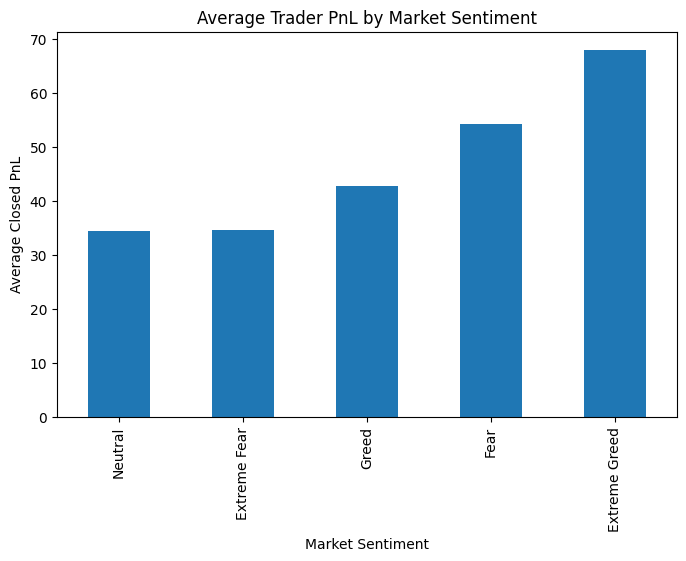

In [56]:
import matplotlib.pyplot as plt

# Average PnL by sentiment
avg_pnl = merged_data.groupby('classification')['Closed PnL'].mean().sort_values()

plt.figure(figsize=(8,5))
avg_pnl.plot(kind='bar')

plt.title("Average Trader PnL by Market Sentiment")
plt.ylabel("Average Closed PnL")
plt.xlabel("Market Sentiment")
plt.show()

**2. Fear Drives Trading Activity and Capital Deployment**  
Trading frequency and average position sizes both peak during Fear and Extreme Fear periods, indicating that traders become more active and deploy more capital in volatile markets. This behavior suggests that participants often perceive fear-driven conditions as opportunities to capitalize on price movements rather than reducing exposure.

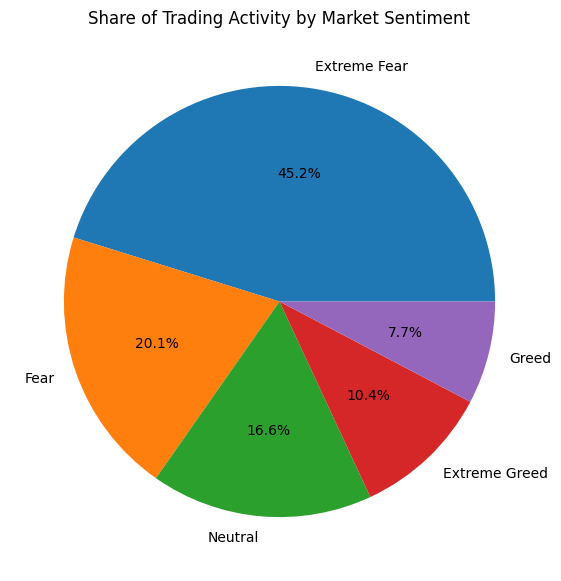

In [59]:
trades_sentiment = (
    merged_data
    .groupby(['date','classification'])
    .size()
    .reset_index(name='num_trades')
)
plt.figure(figsize=(7,7))

trades_sentiment.groupby('classification')['num_trades'].mean() \
    .sort_values(ascending=False) \
    .plot(kind='pie', autopct='%1.1f%%')

plt.ylabel("")
plt.title("Share of Trading Activity by Market Sentiment")
plt.show()


**3. Higher Returns Are Associated with Greater Downside Risk**

Inconsistent traders generate higher total profits than consistent traders but exhibit significantly greater return variability and deeper average losses. The higher standard deviation of PnL indicates more volatile performance, suggesting that their profitability is driven by higher risk exposure. In contrast, consistent traders demonstrate stronger loss control and more stable return patterns, reflecting a more disciplined trading approach.

This pattern highlights a clear risk–return tradeoff within the dataset, where higher profitability is accompanied by increased performance volatility.

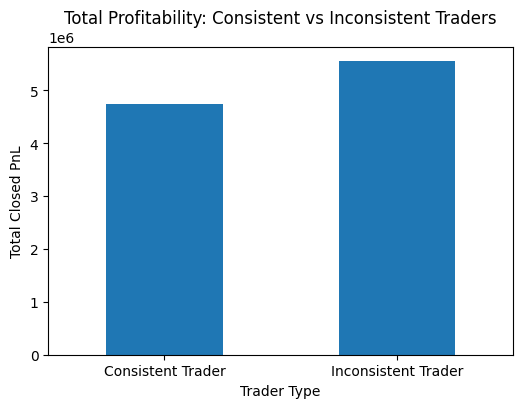

In [62]:
merged_data.groupby('consistency')['Closed PnL'].sum().plot(
    kind='bar',
    figsize=(6,4)
)

plt.title("Total Profitability: Consistent vs Inconsistent Traders")
plt.xlabel("Trader Type")
plt.ylabel("Total Closed PnL")
plt.xticks(rotation=0)
plt.show()

In [64]:
merged_data.groupby('consistency')['Closed PnL'].std()


,Closed PnL
consistency,
Consistent Trader,445.658089
Inconsistent Trader,1317.405824


## **Part C**— Actionable Trading Rules

**Rule 1: Increase Trading Activity During Fear, but Restrict Position Size for High-Variance Traders**  
Fear-driven markets exhibit the highest trading activity and capital deployment, indicating the presence of volatility-based opportunities. Traders may increase participation during these regimes; however, inconsistent traders — who demonstrate higher return volatility and larger losses — should operate with capped position sizes to prevent outsized drawdowns.

**Operational Guideline:**  
If market sentiment = Fear or Extreme Fear → allow higher trade frequency, but enforce stricter position limits for inconsistent traders.

---

**Rule 2: Reduce Position Aggression During Extreme Greed to Protect Against Tail Risk**  
Although Extreme Greed periods show stronger profitability and win rates, they also produce the largest losses in the dataset, suggesting elevated reversal risk.

**Operational Guideline:**  
If market sentiment = Extreme Greed → scale down position sizes and avoid concentrated bets, particularly for infrequent traders who exhibit weaker loss control.


### **Clustering traders into behavioral archetypes**


In [65]:
# Aggregate trader-level behavioral metrics for clustering
trader_features = merged_data.groupby('Account').agg({
    'Closed PnL':'mean',     # average profitability
    'Size USD':'mean',      # average position size (risk proxy)
    'is_win':'mean'         # win rate
}).rename(columns={
    'Closed PnL':'avg_pnl',
    'Size USD':'avg_size',
    'is_win':'win_rate'
})

# Add trading frequency as a behavioral indicator
trade_frequency = merged_data.groupby('Account').size().rename('trade_count')

trader_features = trader_features.join(trade_frequency)

trader_features.head()

,avg_pnl,avg_size,win_rate,trade_count
Account,,,,
0x083384f897ee0f19899168e3b1bec365f52a9012,419.127768,16159.576734,0.359612,3818
0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,6.577654,1653.226327,0.442720,7280
0x271b280974205ca63b716753467d5a371de622ab,-18.492043,8893.000898,0.301917,3809
0x28736f43f1e871e6aa8b1148d38d4994275d72c4,9.951530,507.626933,0.438585,13311
0x2c229d22b100a7beb69122eed721cee9b24011dd,52.071011,3138.894782,0.519914,3239


In [69]:
from sklearn.preprocessing import StandardScaler

# Standardize features so that clustering is not dominated by large numeric ranges
scaler = StandardScaler()
scaled_features = scaler.fit_transform(trader_features)

In [70]:
from sklearn.cluster import KMeans

# Segment traders into behavioral groups based on activity, risk, and performance
kmeans = KMeans(n_clusters=3, random_state=42)

trader_features['cluster'] = kmeans.fit_predict(scaled_features)

trader_features.head()

,avg_pnl,avg_size,win_rate,trade_count,cluster
Account,,,,,
0x083384f897ee0f19899168e3b1bec365f52a9012,419.127768,16159.576734,0.359612,3818,0
0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,6.577654,1653.226327,0.442720,7280,1
0x271b280974205ca63b716753467d5a371de622ab,-18.492043,8893.000898,0.301917,3809,1
0x28736f43f1e871e6aa8b1148d38d4994275d72c4,9.951530,507.626933,0.438585,13311,2
0x2c229d22b100a7beb69122eed721cee9b24011dd,52.071011,3138.894782,0.519914,3239,1


In [71]:
# Examine average metrics within each cluster to interpret trader archetypes
cluster_summary = trader_features.groupby('cluster').mean()

cluster_summary


,avg_pnl,avg_size,win_rate,trade_count
cluster,,,,
0,206.036166,10357.837334,0.439780,4009.500000
1,30.227394,4033.276520,0.381526,3077.642857
2,38.390661,1915.636756,0.379881,20003.833333


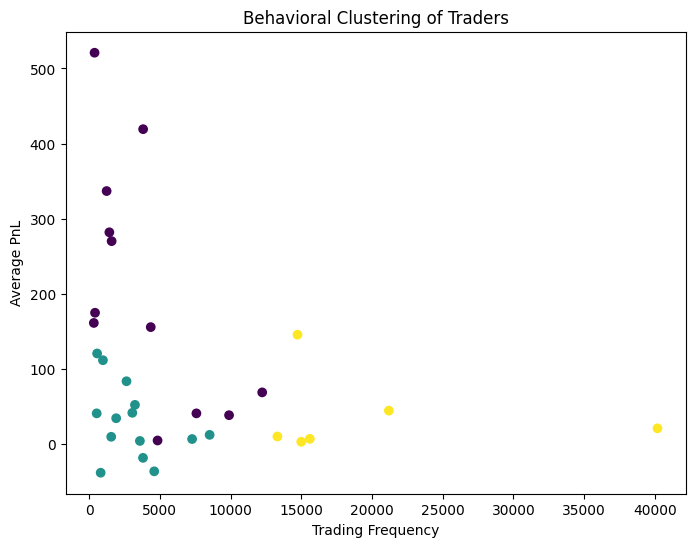

In [72]:
# Visualize behavioral separation between traders
plt.figure(figsize=(8,6))

plt.scatter(
    trader_features['trade_count'],
    trader_features['avg_pnl'],
    c=trader_features['cluster']
)

plt.xlabel("Trading Frequency")
plt.ylabel("Average PnL")
plt.title("Behavioral Clustering of Traders")

plt.show()

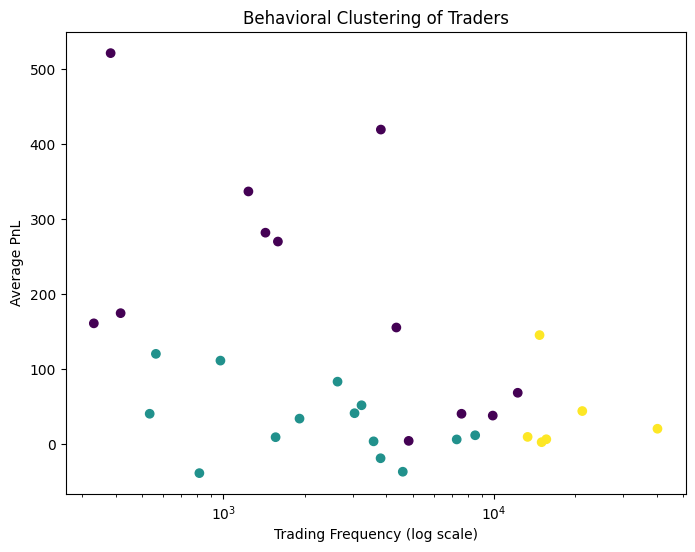

In [73]:
plt.figure(figsize=(8,6))

plt.scatter(
    trader_features['trade_count'],
    trader_features['avg_pnl'],
    c=trader_features['cluster']
)

plt.xscale('log')

plt.xlabel("Trading Frequency (log scale)")
plt.ylabel("Average PnL")
plt.title("Behavioral Clustering of Traders")

plt.show()


**PCA**

In [74]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca_features = pca.fit_transform(scaled_features)

trader_features['pca1'] = pca_features[:,0]
trader_features['pca2'] = pca_features[:,1]


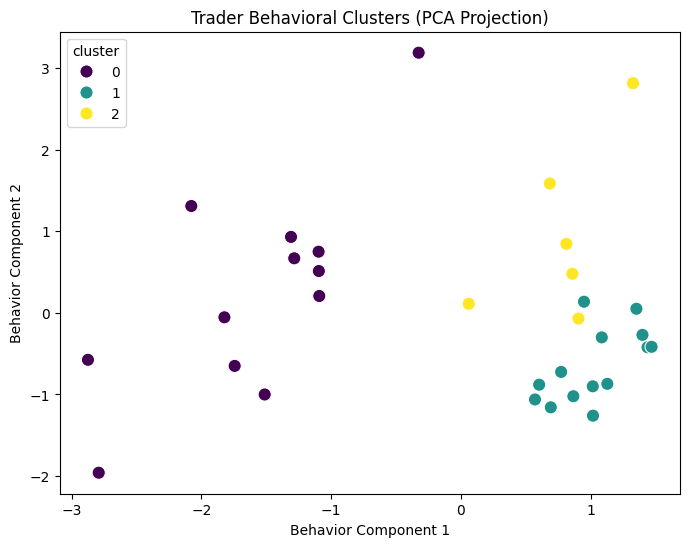

In [75]:
import seaborn as sns

plt.figure(figsize=(8,6))

sns.scatterplot(
    data=trader_features,
    x='pca1',
    y='pca2',
    hue='cluster',
    palette='viridis',
    s=90
)

plt.title("Trader Behavioral Clusters (PCA Projection)")
plt.xlabel("Behavior Component 1")
plt.ylabel("Behavior Component 2")

plt.show()